# 网络流量分析

- 4/13 被通知网络流量异常
- 4/17 分析 2017/04/10~2017/04/15 的网络使用情况

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

In [3]:
import sys 
reload(sys)
sys.setdefaultencoding('gb2312')

gb_id = u'工号'.encode('gb2312')
gb_name = u'姓名'.encode('gb2312')
gb_datetime = u'日期时间'.encode('gb2312')
gb_type = u'类型'.encode('gb2312')
gb_url = u'网站'.encode('gb2312')
gb_volume = u'流量'.encode('gb2312')

In [4]:
# 载入数据 0410~0415
df0410 = pd.read_csv('0410.csv',index_col=gb_datetime,parse_dates=True)
df0411 = pd.read_csv('0411.csv',index_col=gb_datetime,parse_dates=True)
df0412 = pd.read_csv('0412.csv',index_col=gb_datetime,parse_dates=True)
df0413 = pd.read_csv('0413.csv',index_col=gb_datetime,parse_dates=True)
df0414 = pd.read_csv('0414.csv',index_col=gb_datetime,parse_dates=True)
df0415 = pd.read_csv('0415.csv',index_col=gb_datetime,parse_dates=True)

df = pd.concat([df0410,df0411,df0412,df0413,df0414,df0415])
df.ix[0]

工号            315657
姓名               吕明宪
类型                营销
网站                ::
流量              0.02
Unnamed: 6       NaN
Name: 2017-04-10 08:34:19, dtype: object

In [5]:
# 总流量
df[gb_volume].sum()

1648.49

In [6]:
# 流量排行
df.groupby(gb_type)[gb_volume].sum().sort_values(ascending=False).head(10)

类型
百度音乐        1082.08
IT相关         189.91
搜索引擎          79.13
未识别应用         61.74
OneDrive      31.64
PC微信传文件       27.54
PC微信收文件       26.01
微信            20.16
新闻门户          14.10
IT行业          13.38
Name: 流量, dtype: float64

- 百度音乐占大部分流量

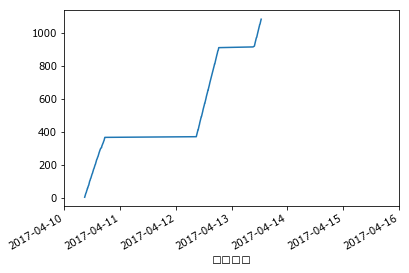

In [7]:
# 百度音乐累计流量
df[df[gb_type] == u'百度音乐'][gb_volume].cumsum().plot(xlim=['2017-04-10','2017-04-16'])

- 接到通知即刻停止使用百度音乐，在4/13以后不再产生流量